In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [5]:
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [7]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [9]:
X = np.r_[X_inliers, X_outliers]

In [11]:
# 📍 LOF Modeli
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_  # LOF skorları

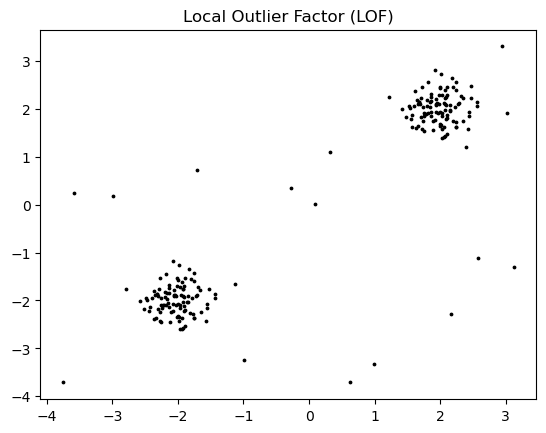

In [13]:
# 🎨 Aykırıları görselleştirme
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label="Normal")

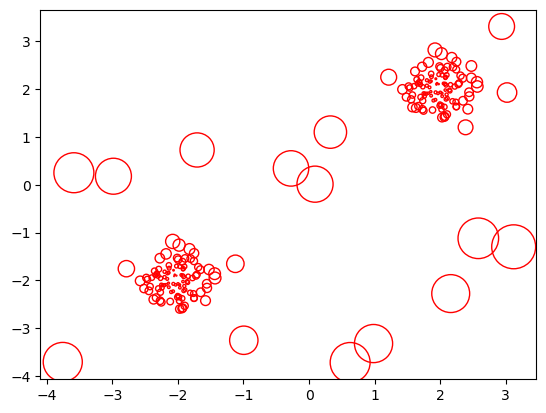

In [15]:
# Aykırılar
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label="Aykırılar")

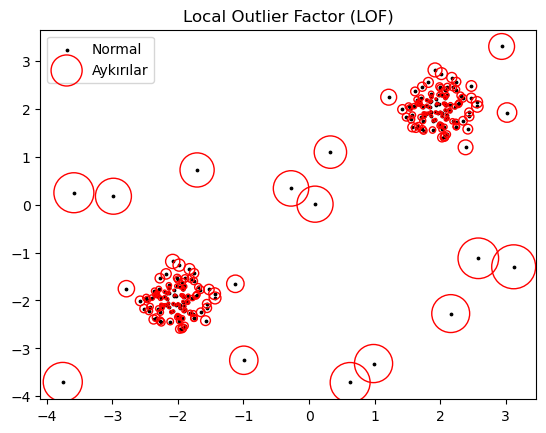

In [19]:
plt.title("Local Outlier Factor (LOF)")
# Normal noktalar
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label="Normal")
# Aykırılar
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label="Aykırılar")
plt.legend()  # Artık uyarı vermez
plt.show()

In [ ]:
###Dizbetes Dataset

In [21]:
import pandas as pd

In [23]:
def diabetes_load():
    data = pd.read_csv("/Users/ozkan/OneDrive/Desktop/Feature_Engineering/Diabetes.csv")
    return data

In [25]:
df = diabetes_load()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = df[["Glucose", "Insulin"]]

In [39]:
from sklearn.neighbors import LocalOutlierFactor

# LOF Model (neighbor number=20, %5 outlier assumption)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(X)

# LOF scores
lof_scores = clf.negative_outlier_factor_

# Outlier and Normal Observations //  1=Normal, -1=Outlier
df["LOF_Score"] = lof_scores
df["LOF_Label"] = y_pred

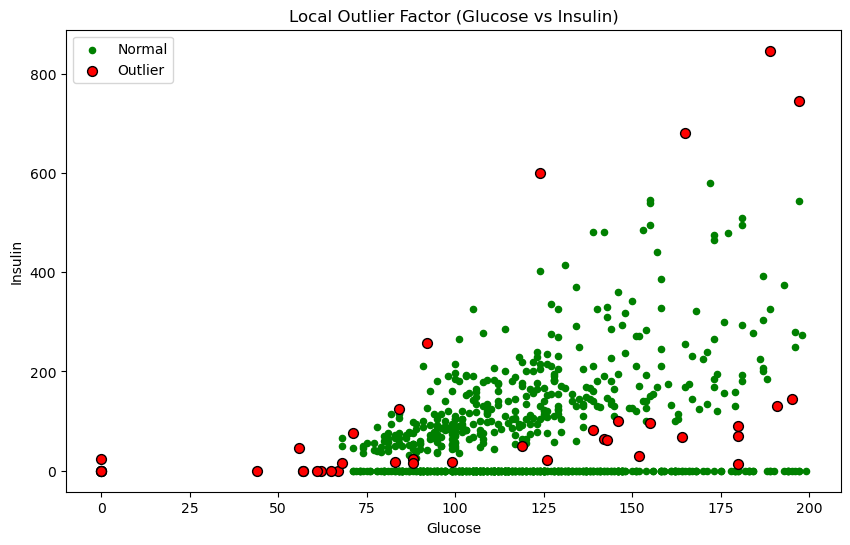

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Local Outlier Factor (Glucose vs Insulin)")

# 🟢 Normal Observations
plt.scatter(X[y_pred == 1]["Glucose"], X[y_pred == 1]["Insulin"],
            color="green", label="Normal", s=20)

# 🔴 Outliers
plt.scatter(X[y_pred == -1]["Glucose"], X[y_pred == -1]["Insulin"],
            color="red", label="Outlier", s=50, edgecolors="black")

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [47]:
# Outliers Re-assignment

threshold = np.quantile(lof_scores, 0.05)  # %5 aykırı oranı
upper_glucose = df.loc[lof_scores > threshold, "Glucose"].max()
lower_glucose = df.loc[lof_scores > threshold, "Glucose"].min()
upper_insulin = df.loc[lof_scores > threshold, "Insulin"].max()
lower_insulin = df.loc[lof_scores > threshold, "Insulin"].min()

# Baskılama
df.loc[lof_scores <= threshold, "Glucose"] = np.clip(df.loc[lof_scores <= threshold, "Glucose"], lower_glucose, upper_glucose)
df.loc[lof_scores <= threshold, "Insulin"] = np.clip(df.loc[lof_scores <= threshold, "Insulin"], lower_insulin, upper_insulin)

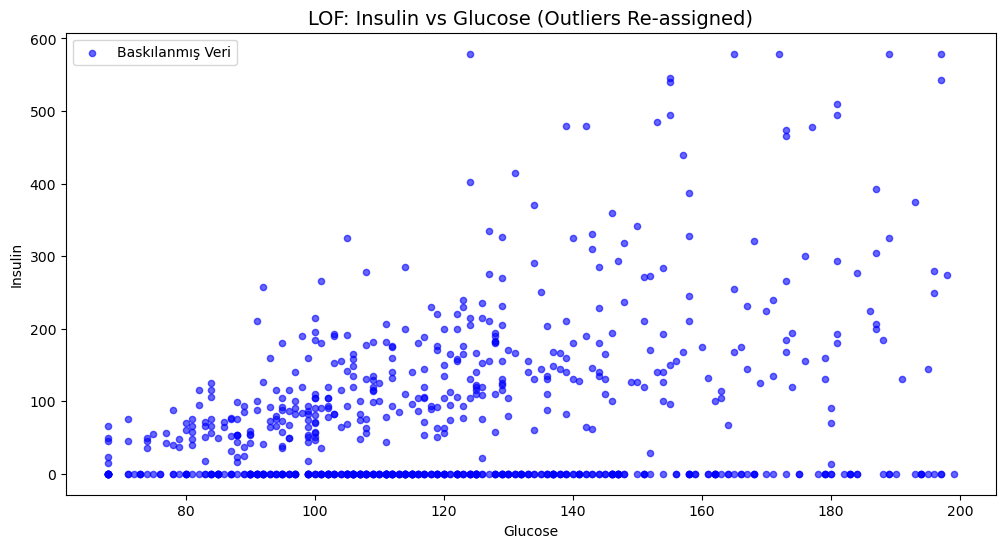

In [51]:
plt.figure(figsize=(12, 6))
plt.title("LOF: Insulin vs Glucose (Outliers Re-assigned)", fontsize=14)

plt.scatter(df["Glucose"], df["Insulin"],
            color="blue", label="Baskılanmış Veri", s=20, alpha=0.6)

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()